In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
df = pd.read_csv('datasets/train.csv')
df.head()

,review_id,review,rating
0,0,Ga disappointed neat products .. Meletot Hilsn...,1
1,1,"Rdtanya replace broken glass, broken chargernya",1
2,2,Nyesel bngt dsni shopping antecedent photo mes...,1
3,3,Sent a light blue suit goods ga want a refund,1
4,4,Pendants came with dents and scratches on its ...,1


In [3]:
df_test = pd.read_csv('datasets/test.csv')
df_test.head()

,review_id,review
0,1,"Great danger, cool, motif and cantik2 jg model..."
1,2,One of the shades don't fit well
2,3,Very comfortable
3,4,Fast delivery. Product expiry is on Dec 2022. ...
4,5,it's sooooo cute! i like playing with the glit...


## Exploration

In [4]:
print('Shape of data: ', df.shape)

# 146811 rows, 3 colums

Shape of data:  (146811, 3)


In [5]:
df.isnull().sum()

# there is no null values 

review_id    0
review       0
rating       0
dtype: int64

In [6]:
print('Rating types: ', df['rating'].unique())
print('Rating proportion:\n',df['rating'].value_counts())

Rating types:  [1 2 3 4 5]
Rating proportion:
 4    41865
5    41515
3    35941
1    14785
2    12705
Name: rating, dtype: int64


Text(0, 0.5, 'Count')

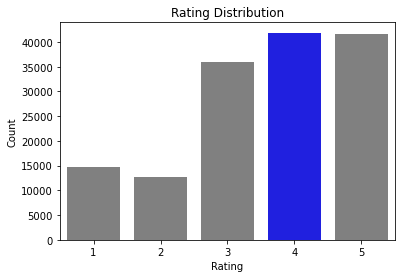

In [7]:
values = df['rating'].value_counts().sort_index()
idx = df['rating'].unique()
clrs = ['grey' if (x < max(values)) else 'blue' for x in values ]
ax = sns.barplot(x=idx, y=values, palette=clrs) # color=clrs)
ax.set_title('Rating Distribution')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')

# people mostly give 4 rating

Text(0.5, 1.0, 'Number of characters present in each sentence')

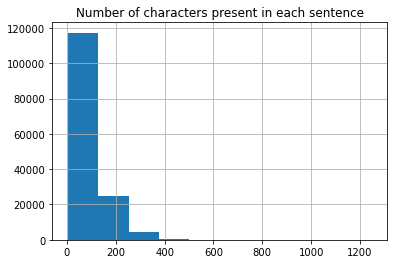

In [8]:
ax = df['review'].str.len().hist()
plt.title('Number of characters present in each sentence')

## Data Preprocessing (Cleansing)

In [9]:
import string
import re
import nltk

def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

# not my original code (spanyol code)
def recover_shortened_words(text):
  
    text = re.sub(r'\bapaa\b', 'apa', text)
    
    text = re.sub(r'\bbsk\b', 'besok', text)
    text = re.sub(r'\bbrngnya\b', 'barangnya', text)
    text = re.sub(r'\bbrp\b', 'berapa', text)
    text = re.sub(r'\bbgt\b', 'banget', text)
    text = re.sub(r'\bbngt\b', 'banget', text)
    text = re.sub(r'\bgini\b', 'begini', text)
    text = re.sub(r'\bbrg\b', 'barang', text)
    
    text = re.sub(r'\bdtg\b', 'datang', text)
    text = re.sub(r'\bd\b', 'di', text)
    text = re.sub(r'\bsdh\b', 'sudah', text)
    text = re.sub(r'\bdri\b', 'dari', text)
    text = re.sub(r'\bdsni\b', 'disini', text)
    
    text = re.sub(r'\bgk\b', 'gak', text)
    
    text = re.sub(r'\bhrs\b', 'harus', text)
    
    text = re.sub(r'\bjd\b', 'jadi', text)
    text = re.sub(r'\bjg\b', 'juga', text)
    text = re.sub(r'\bjgn\b', 'jangan', text)
    
    text = re.sub(r'\blg\b', 'lagi', text)
    text = re.sub(r'\blgi\b', 'lagi', text)
    text = re.sub(r'\blbh\b', 'lebih', text)
    text = re.sub(r'\blbih\b', 'lebih', text)
    
    text = re.sub(r'\bmksh\b', 'makasih', text)
    text = re.sub(r'\bmna\b', 'mana', text)
    
    text = re.sub(r'\borg\b', 'orang', text)
    
    text = re.sub(r'\bpjg\b', 'panjang', text)
    
    text = re.sub(r'\bka\b', 'kakak', text)
    text = re.sub(r'\bkk\b', 'kakak', text)
    text = re.sub(r'\bklo\b', 'kalau', text)
    text = re.sub(r'\bkmrn\b', 'kemarin', text)
    text = re.sub(r'\bkmrin\b', 'kemarin', text)
    text = re.sub(r'\bknp\b', 'kenapa', text)
    text = re.sub(r'\bkcil\b', 'kecil', text)
    
    text = re.sub(r'\bgmn\b', 'gimana', text)
    text = re.sub(r'\bgmna\b', 'gimana', text)
    
    text = re.sub(r'\btp\b', 'tapi', text)
    text = re.sub(r'\btq\b', 'thanks', text)
    text = re.sub(r'\btks\b', 'thanks', text)
    text = re.sub(r'\btlg\b', 'tolong', text)
    text = re.sub(r'\bgk\b', 'tidak', text)
    text = re.sub(r'\bgak\b', 'tidak', text)
    text = re.sub(r'\bgpp\b', 'tidak apa apa', text)
    text = re.sub(r'\bgapapa\b', 'tidak apa apa', text)
    text = re.sub(r'\bga\b', 'tidak', text)
    text = re.sub(r'\btgl\b', 'tanggal', text)
    text = re.sub(r'\btggl\b', 'tanggal', text)
    text = re.sub(r'\bgamau\b', 'tidak mau', text)
    
    text = re.sub(r'\bsy\b', 'saya', text)
    text = re.sub(r'\bsis\b', 'sister', text)
    text = re.sub(r'\bsdgkan\b', 'sedangkan', text)
    text = re.sub(r'\bmdh2n\b', 'semoga', text)
    text = re.sub(r'\bsmoga\b', 'semoga', text)
    text = re.sub(r'\bsmpai\b', 'sampai', text)
    text = re.sub(r'\bnympe\b', 'sampai', text)
    text = re.sub(r'\bdah\b', 'sudah', text)
    
    text = re.sub(r'\bberkali2\b', 'repeated', text)
  
    text = re.sub(r'\byg\b', 'yang', text)
    
    return text

#nltk.download('punkt')
def tokenize(text):
    split=re.split("\W+",text) 
    return split

#nltk.download('stopwords')
def remove_stopwords(text):
    text=[word for word in text if word not in stopword]
    return text

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() # for en
factory = StemmerFactory() # for id
stemmer = factory.create_stemmer() # for id
def stem_lemma(text):
    new_token = []
    new_token.append(lemmatizer.lemmatize(text))
    new_token.append(stemmer.stem(text))
    return new_token    

from nltk.tokenize.treebank import TreebankWordDetokenizer
detok = TreebankWordDetokenizer()

from sklearn.feature_extraction.text import TfidfVectorizer
bow_vectorizer = TfidfVectorizer(lowercase=False, ngram_range=(1,2), analyzer=lambda t:t, min_df=5, sublinear_tf=True)

### Balancing Data Train

In [10]:
#Balancing Data Train
df = df.groupby('rating')
df = pd.DataFrame(df.apply(lambda x: x.sample(df.size().min()).reset_index(drop=True)))
print('Rating proportion:\n',df['rating'].value_counts())

Rating proportion:
 5    12705
4    12705
3    12705
2    12705
1    12705
Name: rating, dtype: int64


Text(0, 0.5, 'Count')

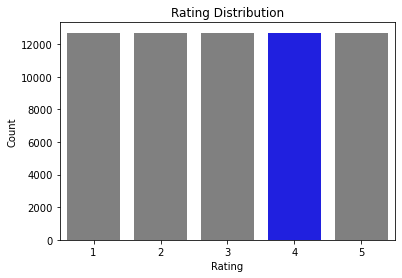

In [11]:
values1 = df['rating'].value_counts().sort_index()
idx1 = df['rating'].unique()
clrs1 = ['grey' if (x < max(values)) else 'blue' for x in values]
ax = sns.barplot(x=idx1, y=values1, palette=clrs1) # color=clrs)
ax.set_title('Rating Distribution')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')

#### Cleaning Data Train

In [12]:
data = df[['review', 'rating']]
#remove punctuation
data['clean_text']=data['review'].apply(lambda x: remove_punctuation(x))
#remove hyperlink
data['clean_text'] = data['clean_text'].str.replace(r"http\S+", "") 
#remove emoji
data['clean_text'] = data['clean_text'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
#convert all words to lowercase
data['clean_text'] = data['clean_text'].str.lower()
data['clean_text'] = data['clean_text'].apply(recover_shortened_words)
#tokenization
data['clean_text_tokenize']=data['clean_text'].apply(lambda x: tokenize(x.lower()))
#remove stopwords
import nltk
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
data['clean_text_tokenize_stopwords'] = data['clean_text_tokenize'].apply(lambda x: remove_stopwords(x))
#stemming
nltk.download('wordnet')
data['clean_text_tokenize_stopwords_lemma'] = data['clean_text_tokenize_stopwords'].apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
#data['clean_text_stopwords'] = data['clean_text_tokenize_stopwords'].apply(lambda x: detok.detokenize(x))
data_train_cleaned = data[['clean_text', 'clean_text_tokenize_stopwords_lemma','rating']]
data_train_cleaned.head(5)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ricky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ricky\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


clean_text  \
rating                                                        
1      0                    the product quality is not good   
       1                       unlike in it i do not buy it   
       2                             item shipped very late   
       3                sumua ugly solution tidak real pick   
       4  check the order if right i received wrong shoe...   

                        clean_text_tokenize_stopwords_lemma  rating  
rating                                                               
1      0                         [, product, quality, good]       1  
       1                                      [unlike, buy]       1  
       2                            [, item, shipped, late]       1  
       3         [sumua, ugly, solution, tidak, real, pick]       1  
       4  [check, order, right, received, wrong, shoe, c...       1

In [13]:
data_train_cleaned['clean_text_tokenize_stopwords_lemma'] = data_train_cleaned['clean_text_tokenize_stopwords_lemma'].apply(lambda x: detok.detokenize(x))

data_train_cleaned.head(5)

<ipython-input-13-54a018bab4af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_cleaned['clean_text_tokenize_stopwords_lemma'] = data_train_cleaned['clean_text_tokenize_stopwords_lemma'].apply(lambda x: detok.detokenize(x))


clean_text  \
rating                                                        
1      0                    the product quality is not good   
       1                       unlike in it i do not buy it   
       2                             item shipped very late   
       3                sumua ugly solution tidak real pick   
       4  check the order if right i received wrong shoe...   

                        clean_text_tokenize_stopwords_lemma  rating  
rating                                                               
1      0                               product quality good       1  
       1                                         unlike buy       1  
       2                                  item shipped late       1  
       3                sumua ugly solution tidak real pick       1  
       4  check order right received wrong shoe customer...       1

## Modelling Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [51]:
# splitting dataset
X = data_train_cleaned['clean_text_tokenize_stopwords_lemma']
Y = data_train_cleaned['rating']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(57172,) (57172,)
(6353,) (6353,)


In [18]:
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

In [22]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(data_train_cleaned['clean_text_tokenize_stopwords_lemma'])
X_train_Tfidf = Tfidf_vect.transform(X_train)
X_test_Tfidf = Tfidf_vect.transform(X_test)

In [23]:
print(Tfidf_vect.vocabulary_)

{'product': 3464, 'quality': 3534, 'good': 1901, 'unlike': 4721, 'buy': 756, 'item': 2241, 'shipped': 3987, 'late': 2474, 'ugly': 4680, 'solution': 4163, 'tidak': 4521, 'real': 3591, 'pick': 3314, 'check': 878, 'order': 3122, 'right': 3728, 'received': 3604, 'wrong': 4939, 'shoe': 3996, 'customer': 1162, 'dont': 1400, 'like': 2534, 'next': 2970, 'time': 4531, 'please': 3354, 'manufacturer': 2697, 'need': 2951, 'money': 2854, 'may': 2725, 'aja': 224, 'ya': 4949, 'bos': 662, 'remember': 3657, 'sale': 3783, 'hell': 2017, 'sweat': 4371, 'wearing': 4840, 'shirt': 3990, 'skin': 4080, 'cream': 1124, 'gone': 1899, 'love': 2596, 'statement': 4243, 'gan': 1830, 'different': 1304, 'size': 4072, 'clothes': 943, 'small': 4116, 'two': 4672, 'dress': 1422, 'peeling': 3262, 'edge': 1485, 'message': 2767, 'sent': 3928, 'number': 3047, 'loh': 2578, 'disappointed': 1338, 'shop': 4001, 'serving': 3943, 'le': 2485, 'delivery': 1253, 'slow': 4111, 'affair': 200, 'luxuriant': 2624, 'lum': 2615, 'set': 3946, 

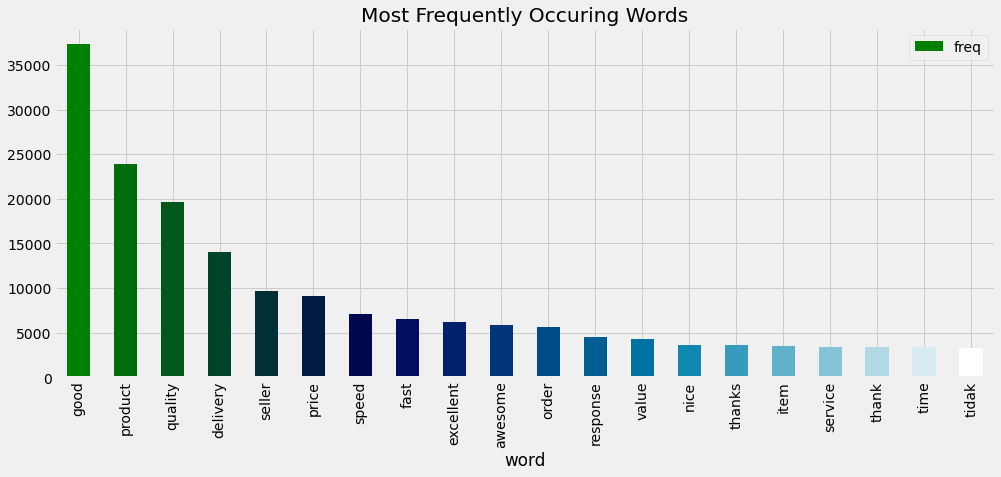

In [25]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data_train_cleaned['clean_text_tokenize_stopwords_lemma'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words")
plt.show()

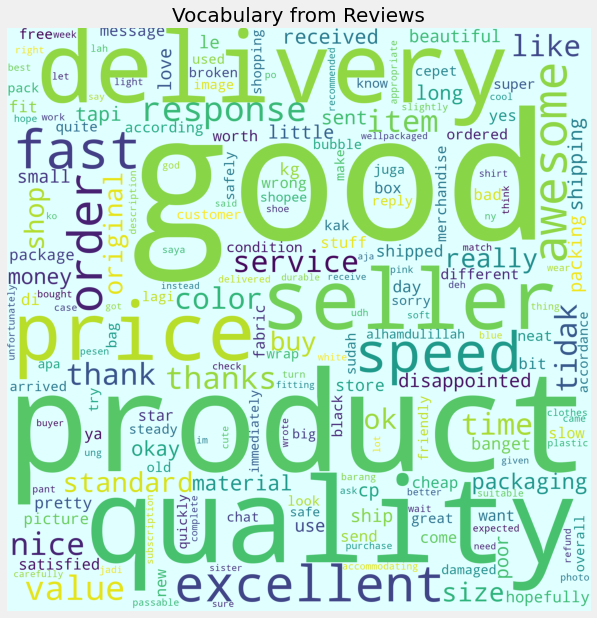

In [26]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Reviews", fontsize = 20)
plt.show()

In [27]:
rf_model = RandomForestClassifier(random_state=3)

In [28]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [31]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 5)
CV_rfc.fit(X_train_Tfidf, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [32]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 500}

Model accuracy: 0.49751626670398097
F1 Score : 0.48918921505113033
Precision : 0.5003151009450335
Recall : 0.4973902453866019
              precision    recall  f1-score   support

           0       0.52      0.72      0.60     11435
           1       0.47      0.54      0.50     11441
           2       0.47      0.49      0.48     11482
           3       0.52      0.34      0.41     11408
           4       0.53      0.40      0.45     11406

    accuracy                           0.50     57172
   macro avg       0.50      0.50      0.49     57172
weighted avg       0.50      0.50      0.49     57172



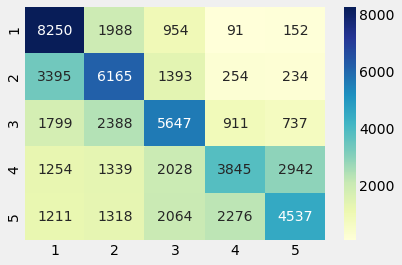

In [50]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
rf_best_model =RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 500, max_depth=8, criterion='entropy')
rf_best_model.fit(X_train_Tfidf, y_train)



y_pred = rf_best_model.predict(X_train_Tfidf)

print('Model accuracy: %s' % accuracy_score(y_train, y_pred))
print('F1 Score :', f1_score(y_train, y_pred, average='macro'))
print('Precision :', precision_score(y_train, y_pred, average='macro'))
print('Recall :', recall_score(y_train, y_pred, average='macro'))
print(classification_report(y_train, y_pred))

cm = confusion_matrix(y_train, y_pred)
cm = pd.DataFrame(cm, [1,2,3,4,5], [1,2,3,4,5])

sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d")
plt.show()

Model accuracy: 0.4207461042027389
F1 Score : 0.40984715995163895
Precision : 0.4133638283165909
Recall : 0.4219662997327666
              precision    recall  f1-score   support

           0       0.48      0.69      0.57      1270
           1       0.40      0.44      0.42      1264
           2       0.40      0.42      0.41      1223
           3       0.38      0.26      0.31      1297
           4       0.41      0.30      0.35      1299

    accuracy                           0.42      6353
   macro avg       0.41      0.42      0.41      6353
weighted avg       0.41      0.42      0.41      6353



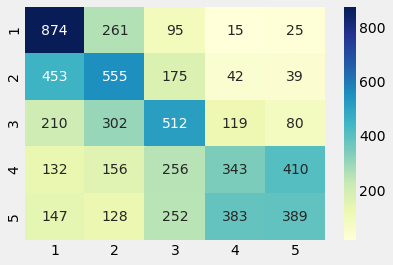

In [44]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
rf_best_model =RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 500, max_depth=8, criterion='entropy')
rf_best_model.fit(X_train_Tfidf, y_train)


ytest = np.array(y_test)
y_pred = rf_best_model.predict(X_test_Tfidf)

print('Model accuracy: %s' % accuracy_score(y_test, y_pred))
print('F1 Score :', f1_score(y_test, y_pred, average='macro'))
print('Precision :', precision_score(y_test, y_pred, average='macro'))
print('Recall :', recall_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, [1,2,3,4,5], [1,2,3,4,5])

sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d")
plt.show()

In [47]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rf_best_model, X = X_train_Tfidf, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.43481077556715997
Standard Variance : 0.0071414182391784774
